# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("seaborn")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("crime_reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307920 entries, 0 to 2307919
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21063
Address                             12
Zip Code                         14210
Council District                 47158
APD Sector                        9034
APD District                      9510
PRA                              10776
Census Tract                   1592810
Clearance Status                606590
Clearance Date                  337385
UCR Category                   1520268
Category Description           1520268
X-coordinate                     10192
Y-coordinate                     10192
Latitude                         38991
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2307915,2019700416,BURGLARY NON RESIDENCE,502,N,03/10/2019 06:30:00 PM,03/10/2019,1830.0,03/11/2019 09:52:00 AM,03/11/2019,952.0,DEPARTMENT / DISCOUNT STORE,3200 PALM WAY,78758.0,7.0,AD,2,201.0,NaN,N,04/18/2019,220,Burglary,3119483.0,3119483.0,30.403077,-97.722775,"(30.40307745, -97.72277454)"
2307916,2021281086,AUTO THEFT,700,N,01/28/2021 07:10:00 PM,01/28/2021,1910.0,01/28/2021 07:47:00 PM,01/28/2021,1947.0,RESIDENCE / HOME,715 W SLAUGHTER LN,78748.0,5.0,FR,2,542.0,NaN,N,01/31/2021,240,Auto Theft,3096237.0,3096237.0,30.173524,-97.802559,"(30.17352383, -97.80255884)"
2307917,20125054289,THEFT,600,N,11/16/2012 11:00:00 PM,11/16/2012,2300.0,12/06/2012 12:42:00 PM,12/06/2012,1242.0,COMMERCIAL / OFFICE BUILDING,12404 BLUE WATER CIR,78758.0,7.0,ED,4,204.0,18.26,N,03/05/2013,23H,Theft,3131807.0,3131807.0,30.408373,-97.683525,"(30.40837325, -97.68352511)"
2307918,20122030439,DEADLY CONDUCT,408,N,07/21/2012 03:30:00 AM,07/21/2012,330.0,07/21/2012 03:39:00 AM,07/21/2012,339.0,STREETS / HWY / ROAD / ALLEY,8613 CLAUDE CT,78747.0,2.0,FR,7,600.0,NaN,C,07/30/2012,13A,Aggravated Assault,3116626.0,3116626.0,30.150635,-97.738634,"(30.15063483, -97.73863397)"
2307919,20072241838,AGG ASSAULT FAM/DATE VIOLENCE,402,Y,08/12/2007 08:32:00 PM,08/12/2007,2032.0,08/12/2007 08:32:00 PM,08/12/2007,2032.0,STREETS / HWY / ROAD / ALLEY,126 W ALPINE RD,78704.0,3.0,DA,2,474.0,NaN,C,08/15/2007,13A,Aggravated Assault,3108550.0,3108550.0,30.228865,-97.762111,"(30.22886535, -97.76211082)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

828

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2307092 entries, 2003-01-01 to 2021-02-06
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21052
address                            12
zip_code                        14205
council_district                47140
apd_sector                       9030
apd_district                     9506
clearance_status               606356
clearance_date                 337226
latitude                        38963
longitude                       38963
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,THEFT,N,2003-07-09 14:33:00,RESIDENCE / HOME,31 ESPINOSA DR,78744.0,2.0,HE,6,O,2003-07-11,30.217687,-97.684709,2003,1,1,1
2003-01-01,EVADING / VEHICLE PURSUIT,N,2003-01-01 11:53:00,STREETS / HWY / ROAD / ALLEY,8300 N IH 35 SB,78753.0,4.0,ED,1,N,NaT,30.345747,-97.696198,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2008-01-29 18:06:00,OTHER / UNKNOWN,10513 ROBINWOOD CIR,78758.0,4.0,ED,2,NaN,2008-02-05,30.381936,-97.707999,2003,1,1,1
2003-01-01,THEFT FROM BUILDING,N,2003-01-02 12:31:00,BAR / NIGHT CLUB,611 RED RIVER ST,78701.0,9.0,GE,2,N,NaT,30.267057,-97.736772,2003,1,1,1
2003-01-01,HARASSMENT,N,2003-07-30 14:34:00,RESIDENCE / HOME,4911 ABERDEEN CIR,78745.0,3.0,DA,3,NaN,2003-11-18,30.215455,-97.779717,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-02-06,THEFT CATALYTIC CONVERTER,N,2021-02-07 00:45:00,RESIDENCE / HOME,300 E RIVERSIDE DR,78704.0,9.0,HE,1,NaN,NaT,30.254614,-97.743415,2021,2,5,6
2021-02-06,IDENTITY THEFT,N,2021-02-06 15:13:00,STREETS / HWY / ROAD / ALLEY,1600 WICKERSHAM LN,78741.0,3.0,HE,3,NaN,NaT,30.235977,-97.718594,2021,2,5,6
2021-02-06,BURGLARY OF VEHICLE,N,2021-02-06 19:45:00,PARKING LOTS / GARAGE,1400 S CONGRESS AVE,78704.0,9.0,DA,1,NaN,NaT,30.249949,-97.749945,2021,2,5,6
2021-02-06,BURGLARY OF VEHICLE,N,2021-02-06 17:02:00,RESIDENCE / HOME,2100 WICKERSHAM LN,78741.0,3.0,HE,4,NaN,NaT,30.231465,-97.721224,2021,2,5,6
2021-02-06,BURGLARY OF VEHICLE,N,2021-02-06 03:26:00,STREETS / HWY / ROAD / ALLEY,SAN JACINTO BLVD / E 4TH ST,78701.0,9.0,GE,2,NaN,NaT,30.265527,-97.741069,2021,2,5,6


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    207127
78753.0    179349
78701.0    168639
78758.0    159750
78704.0    155012
78745.0    151132
78702.0    136974
78744.0    126604
78723.0    118699
78752.0     84641
78748.0     68315
78759.0     66535
78751.0     64169
78757.0     58088
78705.0     57253
78721.0     47827
78749.0     40522
78724.0     37752
78727.0     35973
78703.0     35264
78731.0     28731
78746.0     28174
78729.0     25350
78750.0     23792
78754.0     22934
Name: zip_code, dtype: int64

78741.0    0.090335
78753.0    0.078220
78701.0    0.073549
78758.0    0.069672
78704.0    0.067606
78745.0    0.065913
78702.0    0.059739
78744.0    0.055216
78723.0    0.051768
78752.0    0.036915
78748.0    0.029794
78759.0    0.029018
78751.0    0.027986
78757.0    0.025334
78705.0    0.024970
78721.0    0.020859
78749.0    0.017673
78724.0    0.016465
78727.0    0.015689
78703.0    0.015380
78731.0    0.012530
78746.0    0.012288
78729.0    0.011056
78750.0    0.010376
78754.0    0.010002
Name: zip_code, dtype: float64

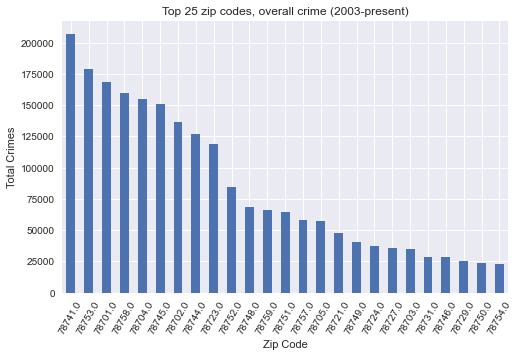

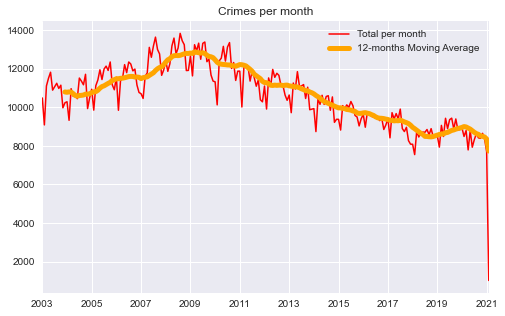

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231268
THEFT                             211919
FAMILY DISTURBANCE                179725
CRIMINAL MISCHIEF                 127663
ASSAULT W/INJURY-FAM/DATE VIOL     78157
BURGLARY OF RESIDENCE              77142
DWI                                69658
PUBLIC INTOXICATION                68770
HARASSMENT                         64352
DISTURBANCE - OTHER                61700
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,HARASSMENT,BURGLARY OF RESIDENCE,CRIMINAL MISCHIEF,FAMILY DISTURBANCE,PUBLIC INTOXICATION,DWI,ASSAULT W/INJURY-FAM/DATE VIOL,TOTAL
occurred_date,,,,,,,,,
2020-10-31,420,205,163,551,881,74,196,253,2743
2020-11-30,483,232,162,507,864,71,183,282,2784
2020-12-31,414,246,186,476,825,50,166,253,2616
2021-01-31,378,238,126,428,786,54,170,254,2434
2021-02-28,85,38,19,48,63,8,15,31,307


<Figure size 432x288 with 0 Axes>

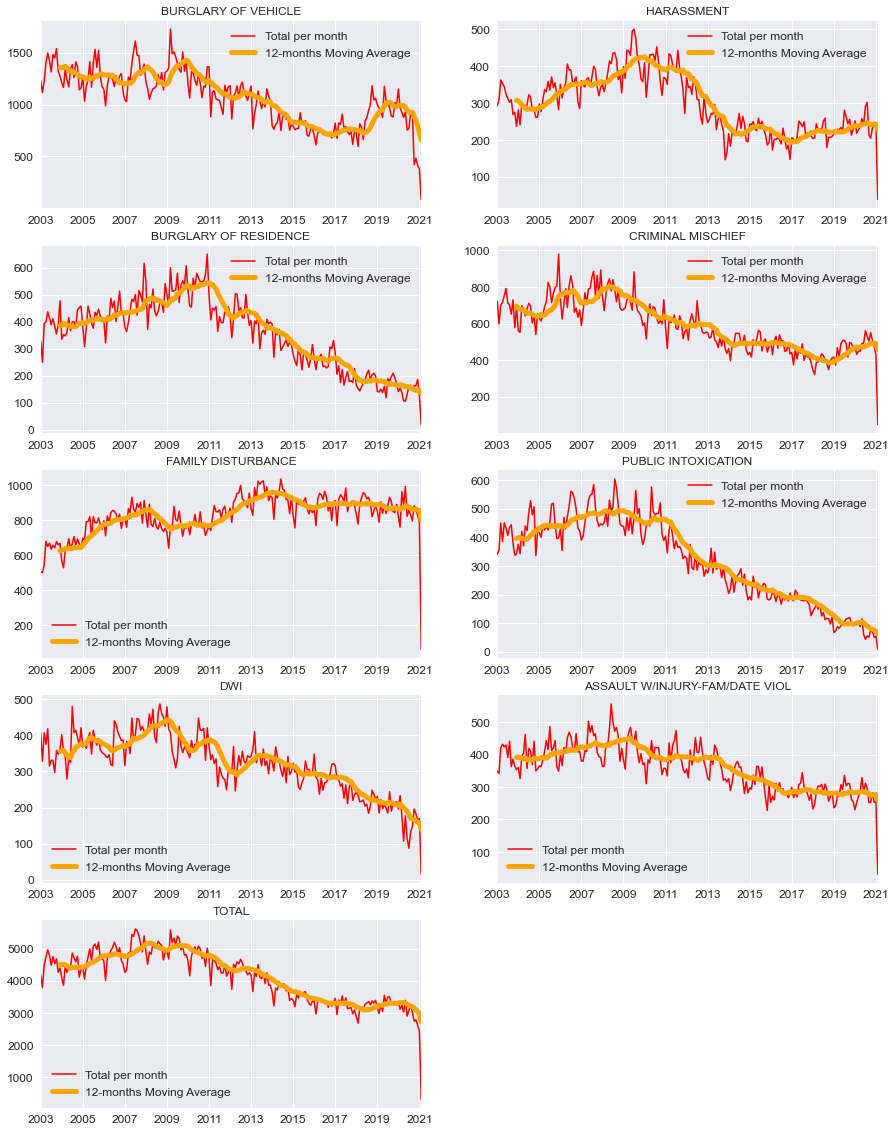

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17151
THEFT                             15786
BURGLARY OF VEHICLE                9273
WARRANT ARREST NON TRAFFIC         8966
DWI                                8328
ASSAULT WITH INJURY                7535
VIOL CITY ORDINANCE - OTHER        6188
POSS OF DRUG PARAPHERNALIA         6045
CRIMINAL MISCHIEF                  5828
CRIMINAL TRESPASS                  3920
POSSESSION OF MARIJUANA            3385
DISTURBANCE - OTHER                3356
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2898
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2592
CRIMINAL TRESPASS/TRANSIENT        2584
THEFT OF BICYCLE                   2513
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2165
DOC FIGHTING                       2111
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1730
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101702
THEFT                             0.093608
BURGLARY OF VEHICLE               0.054987
WARRANT ARREST NON TRAFFIC        0.053167
DWI                               0.049384
ASSAULT WITH INJURY               0.044681
VIOL CITY ORDINANCE - OTHER       0.036694
POSS OF DRUG PARAPHERNALIA        0.035846
CRIMINAL MISCHIEF                 0.034559
CRIMINAL TRESPASS                 0.023245
POSSESSION OF MARIJUANA           0.020072
DISTURBANCE - OTHER               0.019900
CUSTODY ARREST TRAFFIC WARR       0.017748
POSS CONTROLLED SUB/NARCOTIC      0.017185
CAMPING IN PARK                   0.016515
VOCO - ALCOHOL  CONSUMPTION       0.015951
ASSAULT BY CONTACT                0.015370
CRIMINAL TRESPASS/TRANSIENT       0.015323
THEFT OF BICYCLE                  0.014902
URINATING IN PUBLIC PLACE         0.013852
FAMILY DISTURBANCE                0.012838
DOC FIGHTING                      0.012518
PROTECTIVE ORDER                  0.012447
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

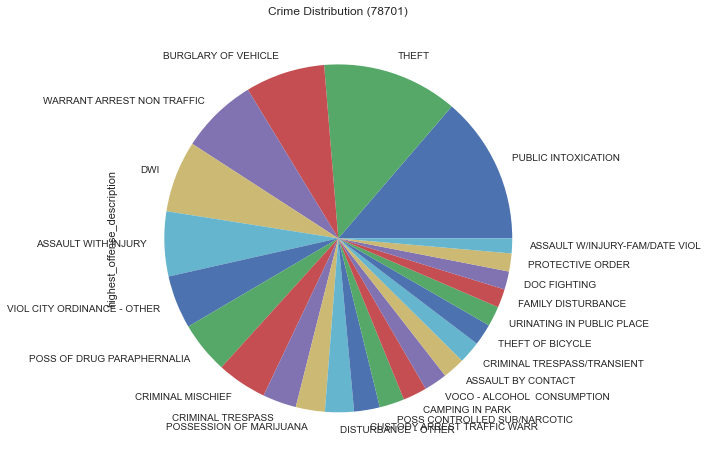

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753? 

THEFT                             17160
BURGLARY OF VEHICLE               15944
FAMILY DISTURBANCE                14680
CRIMINAL MISCHIEF                  9476
THEFT BY SHOPLIFTING               7638
ASSAULT W/INJURY-FAM/DATE VIOL     7163
BURGLARY OF RESIDENCE              6074
DWI                                5018
DISTURBANCE - OTHER                4773
CUSTODY ARREST TRAFFIC WARR        4348
HARASSMENT                         4260
AUTO THEFT                         4236
POSS OF DRUG PARAPHERNALIA         3725
PUBLIC INTOXICATION                3369
ASSAULT WITH INJURY                3311
CRIMINAL TRESPASS                  3144
POSS CONTROLLED SUB/NARCOTIC       2976
RUNAWAY CHILD                      2934
WARRANT ARREST NON TRAFFIC         2795
POSSESSION OF MARIJUANA            2708
BURGLARY NON RESIDENCE             2487
VIOL CITY ORDINANCE - OTHER        1867
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

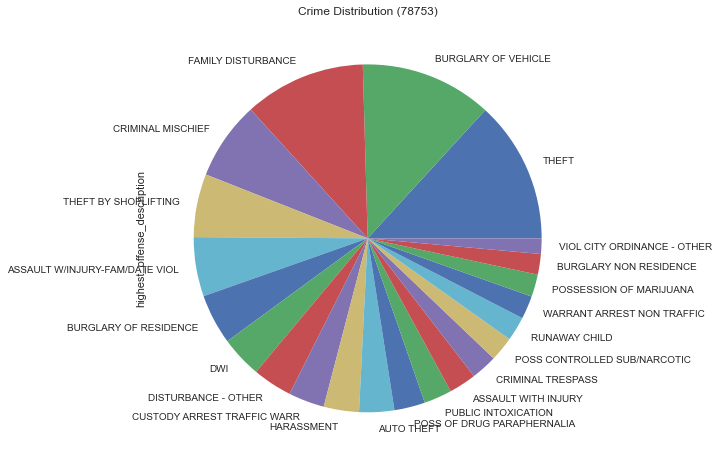

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20380
BURGLARY OF VEHICLE               19816
THEFT                             15603
CRIMINAL MISCHIEF                 11057
ASSAULT W/INJURY-FAM/DATE VIOL     9630
BURGLARY OF RESIDENCE              8883
PUBLIC INTOXICATION                6382
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5666
HARASSMENT                         5528
DISTURBANCE - OTHER                5174
AUTO THEFT                         4637
ASSAULT WITH INJURY                4539
CRIMINAL TRESPASS                  3923
POSS CONTROLLED SUB/NARCOTIC       3869
POSSESSION OF MARIJUANA            3794
THEFT BY SHOPLIFTING               3576
POSS OF DRUG PARAPHERNALIA         3540
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2793
VIOL CITY ORDINANCE - OTHER        2195
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098394
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

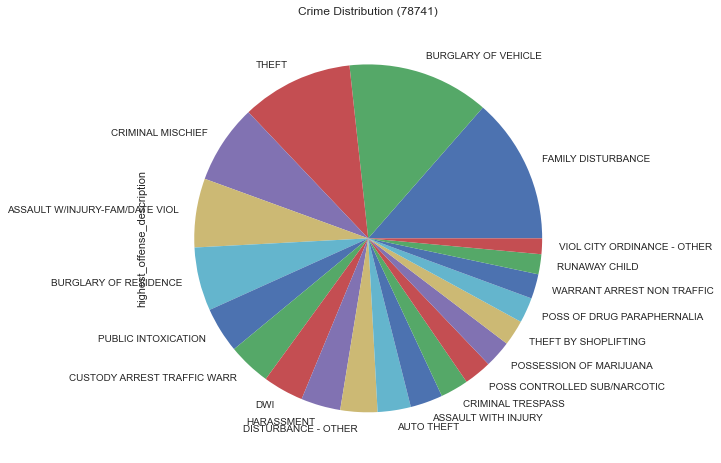

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                14952
BURGLARY OF VEHICLE               14747
THEFT                             13586
CRIMINAL MISCHIEF                  8524
BURGLARY OF RESIDENCE              5869
ASSAULT W/INJURY-FAM/DATE VIOL     5760
HARASSMENT                         5149
DISTURBANCE - OTHER                4523
DWI                                4424
PUBLIC INTOXICATION                3998
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2875
AUTO THEFT                         2852
ASSAULT WITH INJURY                2673
RUNAWAY CHILD                      2603
POSSESSION OF MARIJUANA            2592
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2023
THEFT BY SHOPLIFTING               1986
CRIMINAL TRESPASS                  1959
IDENTITY THEFT                     1587
POSS OF DRUG PARAPHERNALIA         1520
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

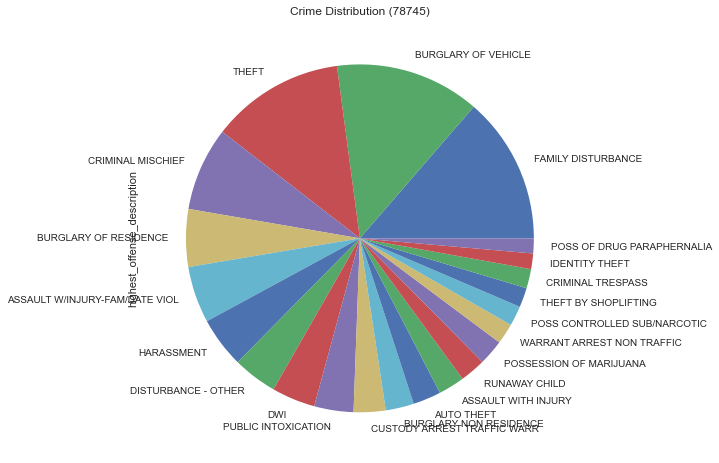

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8632
THEFT                             5613
CRIMINAL MISCHIEF                 4972
THEFT OF BICYCLE                  3491
PUBLIC INTOXICATION               2628
BURGLARY OF RESIDENCE             2122
WARRANT ARREST NON TRAFFIC        1550
CRIMINAL TRESPASS                 1350
AUTO THEFT                        1316
ASSAULT WITH INJURY               1251
DWI                               1216
HARASSMENT                        1216
FAMILY DISTURBANCE                1193
DISTURBANCE - OTHER               1118
BURGLARY NON RESIDENCE             880
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        791
CUSTODY ARREST TRAFFIC WARR        782
GRAFFITI                           779
ASSAULT W/INJURY-FAM/DATE VIOL     691
POSSESSION OF MARIJUANA            659
ASSAULT BY CONTACT                 618
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150769
THEFT                             0.098039
CRIMINAL MISCHIEF                 0.086843
THEFT OF BICYCLE                  0.060975
PUBLIC INTOXICATION               0.045902
BURGLARY OF RESIDENCE             0.037064
WARRANT ARREST NON TRAFFIC        0.027073
CRIMINAL TRESPASS                 0.023580
AUTO THEFT                        0.022986
ASSAULT WITH INJURY               0.021850
DWI                               0.021239
HARASSMENT                        0.021239
FAMILY DISTURBANCE                0.020837
DISTURBANCE - OTHER               0.019527
BURGLARY NON RESIDENCE            0.015370
CRIMINAL TRESPASS/TRANSIENT       0.015161
VIOL CITY ORDINANCE - OTHER       0.013816
CUSTODY ARREST TRAFFIC WARR       0.013659
GRAFFITI                          0.013606
ASSAULT W/INJURY-FAM/DATE VIOL    0.012069
POSSESSION OF MARIJUANA           0.011510
ASSAULT BY CONTACT                0.010794
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

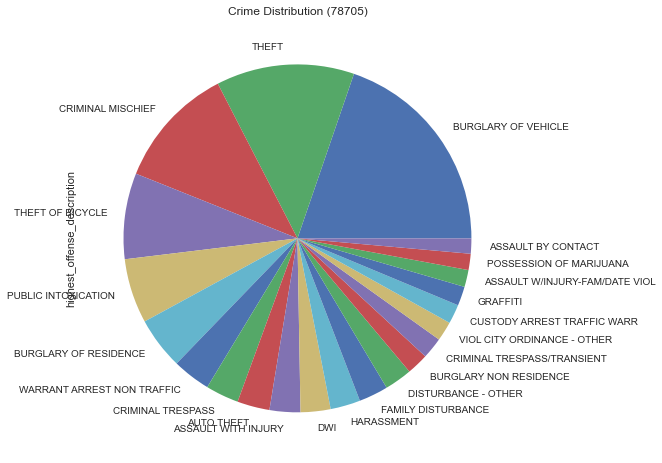

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5388
THEFT                             5088
THEFT BY SHOPLIFTING              2544
CRIMINAL MISCHIEF                 1275
DWI                                881
FAMILY DISTURBANCE                 757
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         626
AUTO THEFT                         607
BURGLARY OF RESIDENCE              519
THEFT FROM PERSON                  462
DISTURBANCE - OTHER                433
IDENTITY THEFT                     429
BURGLARY NON RESIDENCE             357
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            326
PUBLIC INTOXICATION                320
POSSESSION OF MARIJUANA            298
FRAUD - OTHER                      280
SUSPICIOUS PERSON                  256
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                198
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191240
THEFT                             0.180592
THEFT BY SHOPLIFTING              0.090296
CRIMINAL MISCHIEF                 0.045254
DWI                               0.031270
FAMILY DISTURBANCE                0.026869
VIOL CITY ORDINANCE - OTHER       0.023142
HARASSMENT                        0.022219
AUTO THEFT                        0.021545
BURGLARY OF RESIDENCE             0.018421
THEFT FROM PERSON                 0.016398
DISTURBANCE - OTHER               0.015369
IDENTITY THEFT                    0.015227
BURGLARY NON RESIDENCE            0.012671
ASSAULT W/INJURY-FAM/DATE VIOL    0.012068
CRED CARD ABUSE - OTHER           0.011571
PUBLIC INTOXICATION               0.011358
POSSESSION OF MARIJUANA           0.010577
FRAUD - OTHER                     0.009938
SUSPICIOUS PERSON                 0.009086
CUSTODY ARREST TRAFFIC WARR       0.008767
WARRANT ARREST NON TRAFFIC        0.007915
ASSAULT WITH INJURY               0.007028
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

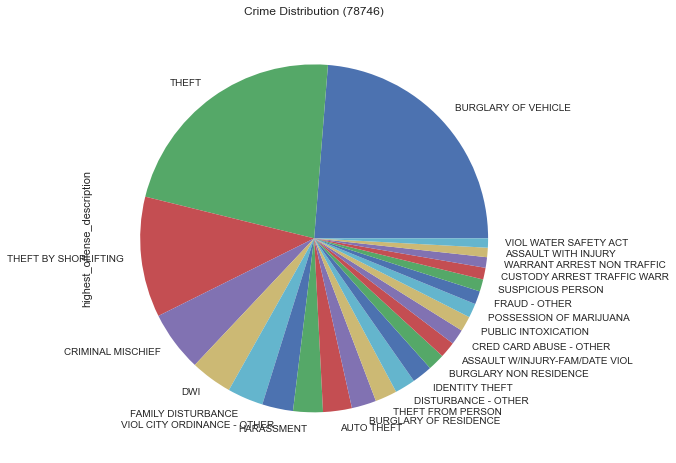

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130865
78753.0    0.099086
78758.0    0.094244
78701.0    0.074400
78723.0    0.074366
78702.0    0.074161
78745.0    0.057726
78752.0    0.052407
78744.0    0.052032
78704.0    0.048486
78721.0    0.028028
78724.0    0.024482
78705.0    0.021447
78757.0    0.020765
78748.0    0.017492
78751.0    0.017049
78759.0    0.013571
78722.0    0.009411
78754.0    0.008320
78727.0    0.007979
78749.0    0.007808
78617.0    0.007740
78729.0    0.007092
78750.0    0.005694
78731.0    0.005285
Name: zip_code, dtype: float64

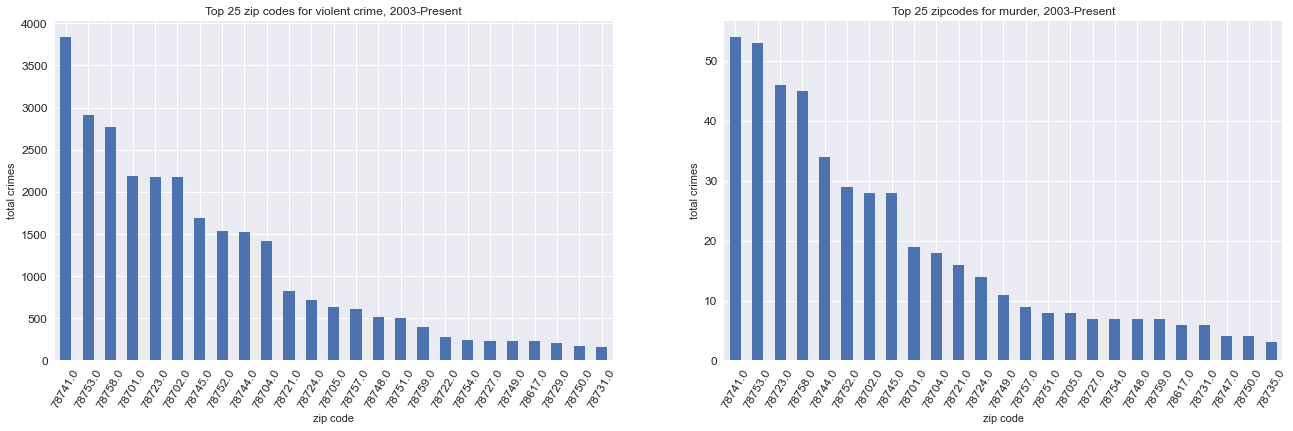

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

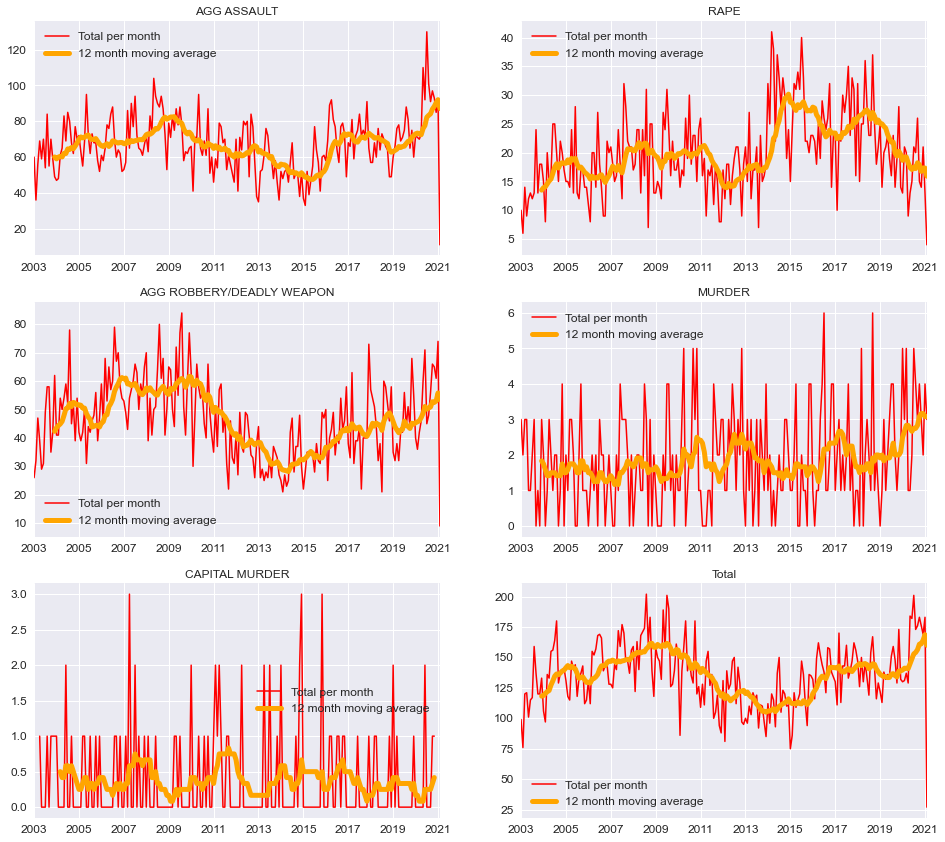

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

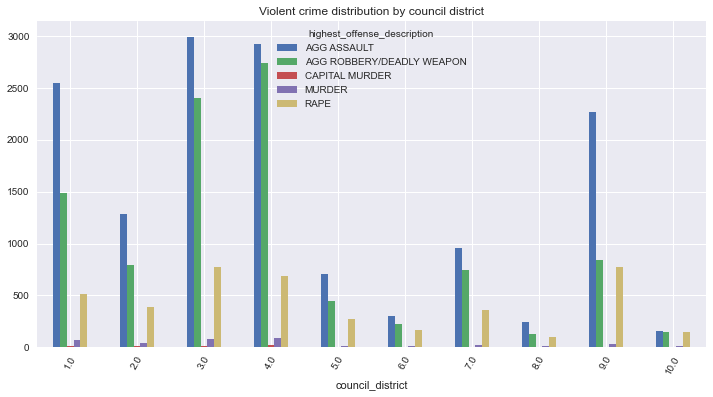

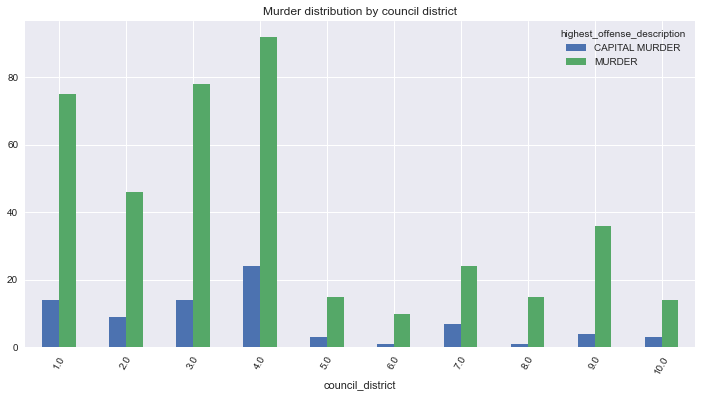

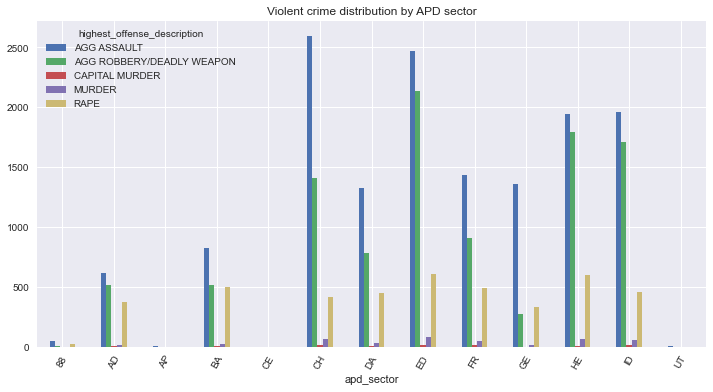

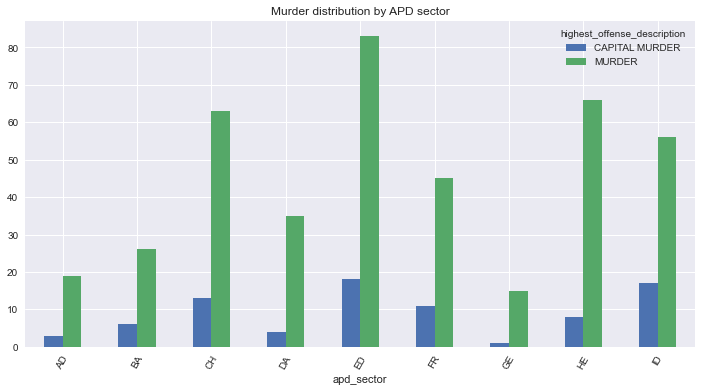

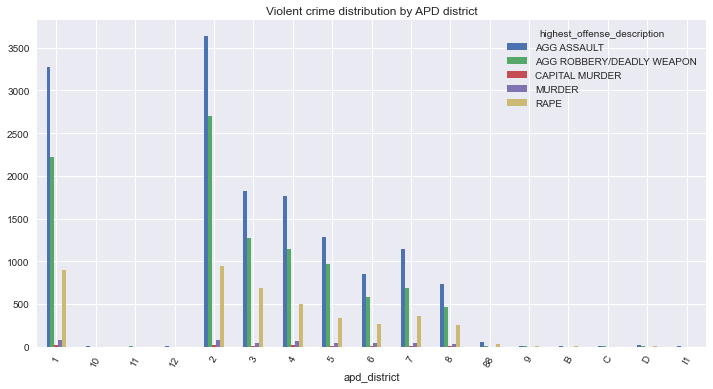

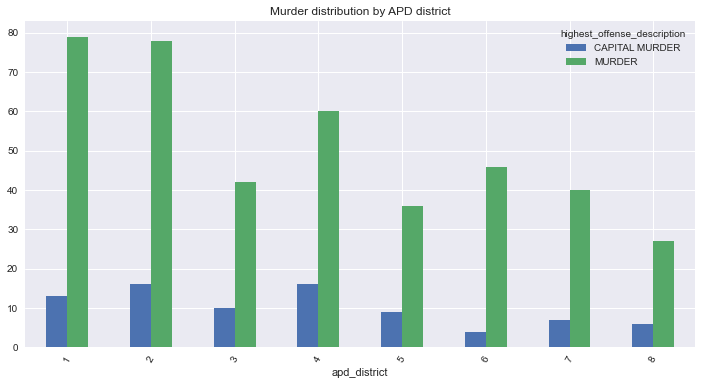

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,656,45,2,7,78
CAMP / CAMPGROUND,21,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


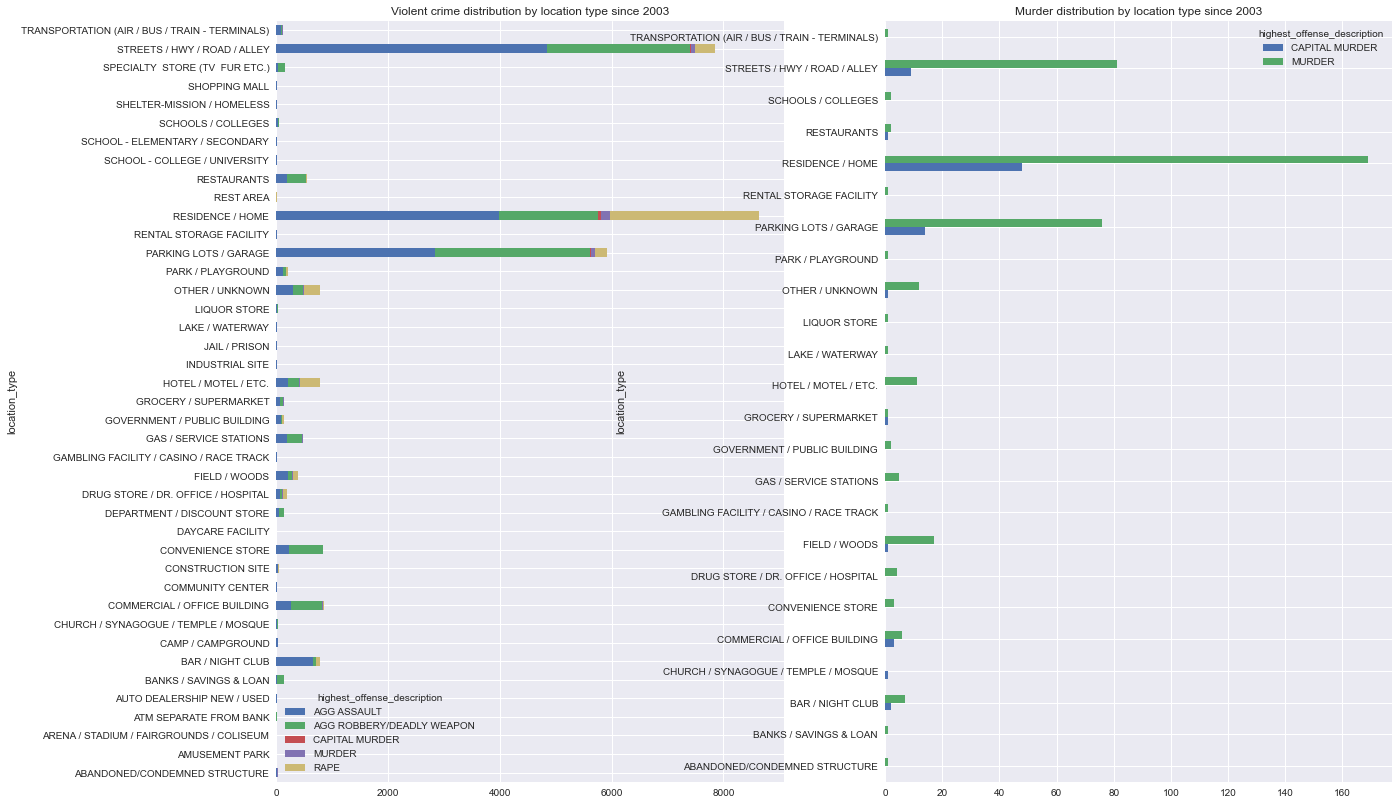

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           67
1700 BURTON DR              63
6409 SPRINGDALE RD          59
00 BLOCK UNKNOWN            59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         55
9200 NORTH PLZ              53
1071 CLAYTON LN             53
1030 NORWOOD PARK BLVD      53
2237 E RIVERSIDE DR         51
1137 GUNTER ST              51
1124 RUTLAND DR             50
Name: address, dtype: int64

In [24]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

8800 N IH 35 SVRD SB         3
6409 SPRINGDALE RD           3
4700 E RIVERSIDE DR          3
8610 N LAMAR BLVD            3
6407 SPRINGDALE RD           3
605 MASTERSON PASS           2
9601 MIDDLE FISKVILLE RD     2
10610 MORADO CIR             2
10503 N LAMAR BLVD           2
7000 DECKER LN               2
2501 ANKEN DR                2
815 W SLAUGHTER LN           2
1711 RUTLAND DR              2
9200 NORTH PLZ               2
9220 N IH 35 SVRD SB         2
2400 WICKERSHAM LN           2
6600 ED BLUESTEIN BLVD SB    2
2713 S CONGRESS AVE          2
1050 SPRINGDALE RD           2
9010 GALEWOOD DR             2
1137 GUNTER ST               2
8225 SAM RAYBURN DR          2
8912 N LAMAR BLVD            2
744 W WILLIAM CANNON DR      2
201 W 5TH ST                 2
2508 E RIVERSIDE DR          2
2915 S IH 35 SVRD NB         2
6118 FAIRWAY ST              2
601 E 15TH ST                2
833 FAIRFIELD DR             2
Name: address, dtype: int64

In [25]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")